# PeMS STGNN

Based on:
https://github.com/VeritasYin/STGCN_IJCAI-18

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
! git clone https://github.com/jackarnold84/STGCN_IJCAI-18.git

Cloning into 'STGCN_IJCAI-18'...


### Format Dataset

In [3]:
# update with the location of the speeds.csv and adj_mat.csv files
speeds_file = '/content/speeds.csv'
adj_mat_file = '/content/adj_mat.csv'

In [4]:
speeds = pd.read_csv('../data/processed/fwy_405_n_ds/csvs/speeds.csv')
adj_mat = pd.read_csv('../data/processed/fwy_405_n_ds/csvs/adj_mat.csv')

In [5]:
# update speed dataset to match the tool
speeds.index = list(pd.to_datetime(speeds['Unnamed: 0']))
speeds = speeds.iloc[:,1:]

# subset amount of data used for training
speeds = speeds.loc[ (speeds.index > pd.to_datetime('05/01/2021')) & (speeds.index < pd.to_datetime('07/01/2021')) ]

# write to file
outfile = 'STGCN_IJCAI-18/dataset/PeMSD7_V_%d.csv' % speeds.shape[1]
speeds.to_csv(outfile, index=False, header=False)

# format adjacency matrix
adj_mat = adj_mat.iloc[:,1:]

# write to file
outfile = 'STGCN_IJCAI-18/dataset/PeMSD7_W_%d.csv' % speeds.shape[1]
adj_mat.to_csv(outfile, index=False, header=False)

### Train Model

In [6]:
%cd STGCN_IJCAI-18/

/content/STGCN_IJCAI-18


In [7]:
! python main.py --n_route=105 --n_his=12 --n_pred=9 --epoch=10

Instructions for updating:
non-resource variables are not supported in the long term

==> Running main.py...

Training configs: Namespace(batch_size=50, epoch=10, graph='default', inf_mode='merge', ks=3, kt=3, lr=0.001, n_his=12, n_pred=9, n_route=105, opt='RMSProp', save=10)
>> Loading dataset with Mean: 60.58, STD: 12.63
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch  0, Step   0: [1280.714, 100.897]
Epoch  0, Step  50: [208.769, 119.512]
Epoch  0, Step 100: [156.896, 100.824]
Epoch  0, Step 150: [179.027, 107.692]
Epoch  0 Training Time 15.332s
Time Step 3: MAPE  6.479%,  6.929%; MAE  2.936, 3.115; RMSE  4.978,  5.208.
Time Step 6: MAPE  8.957%,  9.501%; MAE  4.058, 4.302; RMSE  7.213,  7.530.
Time Step 9: MAPE 10.802%, 11.386%; MAE  4.875, 5.143; RMSE  8.790,  9.083.
Epoch  0 Inference Time 12

### Extract Results

In [8]:
actual = np.load('results/actual.npy')
predicted = np.load('results/predicted.npy')

In [9]:
# helper code to figure out what timestamps were used in the test set
new = [[x[0] for x in y] for y in actual]
new = np.array(new)

seq = new[0:100,5]

full = speeds.iloc[:,5].values

for i in range(len(full) - len(seq)):
  if (full[i:i+len(seq)] == seq).all():
    print(i)


11246


In [10]:
# format into dataframes
ts_start = 11246

actual_df = pd.DataFrame([[x[0] for x in y] for y in actual])
actual_df.columns = speeds.columns
actual_df.index = speeds.index[ts_start:ts_start+new.shape[0]]

predicted_df = pd.DataFrame([[x[0] for x in y] for y in predicted])
predicted_df.columns = speeds.columns
predicted_df.index = speeds.index[ts_start:ts_start+new.shape[0]]

print(predicted_df.shape)
predicted_df.head()

(1340, 105)


,771826,717696,718219,717701,717703,718227,717706,717709,716632,771845,...,767351,717819,717823,767367,717825,717827,771808,771767,772011,772024
2021-06-09 01:15:00,69.078659,68.284225,68.191635,67.898865,64.640404,71.026184,70.098549,68.949120,70.719437,68.809822,...,63.201031,67.765167,66.757439,63.395809,66.961090,67.569954,59.815231,60.536907,68.186478,66.785988
2021-06-09 01:20:00,69.080429,65.744797,68.497330,68.208748,65.354111,71.323563,70.007713,69.335785,70.765518,68.726982,...,63.534912,67.880455,67.060616,63.539101,66.778282,67.373680,59.431446,59.471676,68.174629,66.823929
2021-06-09 01:25:00,69.238525,66.980591,68.404434,68.106148,66.017990,71.165390,70.291199,69.741287,70.783752,68.879768,...,63.529613,67.861099,66.693268,63.339645,66.967415,67.569504,58.560482,59.606178,68.192673,66.440353
2021-06-09 01:30:00,68.802185,66.882042,68.450340,68.289886,65.211121,71.129547,69.826485,68.753609,70.699181,68.439758,...,63.075199,67.522285,66.337296,63.214336,66.765793,67.153793,59.416775,57.173382,68.041611,65.656288
2021-06-09 01:35:00,68.682121,67.275772,68.363922,67.974846,65.980484,70.900597,69.405693,68.043755,70.595856,68.386589,...,63.461418,67.972313,67.010017,63.219185,66.529778,66.770721,60.954956,59.159359,68.107048,65.794144


MAE:  2.658
RMSE: 4.089


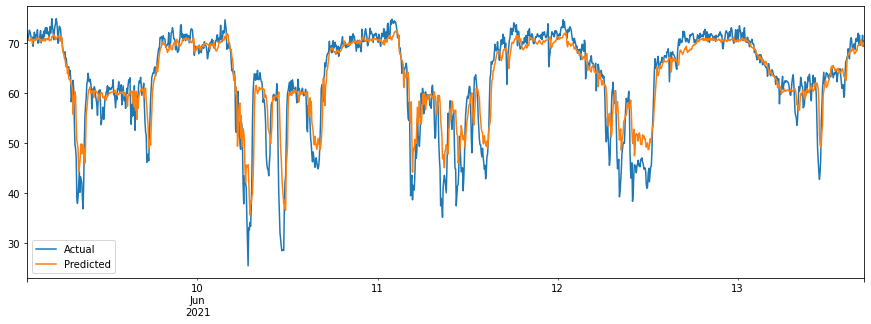

In [11]:
# show results for example station
my_station = '716632'

print('MAE:  %.3f' % mean_absolute_error(actual_df[my_station], predicted_df[my_station]))
print('RMSE: %.3f' % mean_squared_error(actual_df[my_station], predicted_df[my_station], squared=False))

p = pd.DataFrame({
    'Actual': actual_df[my_station], 
    'Predicted': predicted_df[my_station]
}).plot(figsize=(15, 5))